#**Desafío 13: Dimensionalidad y agrupación, parte 1**

##**Francisca Pinto**

### 15 de septiembre de 2021

In [ ]:
#línea necesaria para instalación en Google Colab
!pip install factor_analyzer

In [ ]:
import pandas as pd
import numpy as np

#estadística
import scipy.stats as stats

#gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#gama matplotlib para facilitar escritura de código
%matplotlib inline

#análisis normalidad
import statsmodels.api as sm
import statsmodels.formula.api as smf

#análisis de dataframe
import missingno as msno

import factor_analyzer as factor
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

#quitar warnings
import warnings
warnings.filterwarnings(action = "ignore")

In [ ]:
#customización de gráficos
plt.style.use("seaborn")

##_Contexto_

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupulosidad, Extroversión, Neuroticismo, Apertura Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente

Las 25 preguntas son:

1. A1 Soy indiferente a los sentimientos de otros.
2. A2 Me preocupo del bienestar de otros.
3. A3 Sé cómo confortar a otros.
4. A4 Me agradan los niños.
5. A5 Hago sentir tranquila a la gente.
6. C1 Soy exacto en mi trabajo.
7. C2 Sigo con mis tareas hasta que todo esté perfecto.
8. C3 Hago cosas siguiendo un plan.
9. C4 Hago cosas con el mínimo esfuerzo.
10. C5 Pierdo mi tiempo.
11. E1 No hablo mucho con las personas.
12. E2 Me es difícil acercarme a otros.
13. E3 Sé cómo cautivar gente.
14. E4 Hago amigos de forma fácil.
15. E5 Puedo tomar el cargo de las cosas.
16. N1 Me enojo con facilidad.
17. N2 Me irrito con facilidad.
18. N3 Tengo cambios de humor frecuentes.
19. N4 Usualmente me siento melancólico.
20. N5 Entró en pánico con facilidad.
21. O1 Estoy lleno de ideas.
22. O2 Evito leer material difícil.
23. O3 Tiendo a llevar la conversación a niveles más altos.
24. O4 Dedico tiempo a la reflexión de cosas.
25. O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:

* gender Hombre = 1, Mujer =2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 =
Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 =
Estudios de Postgrado.
* age = Edad en Años.

Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

##**Desafío 1: Lectura de archivos**

1. Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
2. Importe la base de datos bfi.csv y asígnela a un objeto df.
3. Solicite las primeras 5 observaciones con head.

In [ ]:
path_colab = "/content/bfi.csv"
df = pd.read_csv(path_colab)
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


Comentarios:
1. La columna <code>Unnamed: 0</code> se interpreta como un número de fila que no es útil en este caso, por lo que se elimina con <code>.drop()</code>.
2. La columna <code>education</code> con la aplicación del método <code>.head()</code> solo muestra valores nulos. Al mostrar el DataFrame se comprueba que la columna sí tiene datos.

##**Desafío 2: Preprocesamiento**

1. Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.
2. Analice el patrón de datos perdidos con missingno. Comente cuáles son las
principales variables con mayores tasas de valores perdidos.
3. Genere un nuevo objeto donde almacenará la base sin valores perdidos.

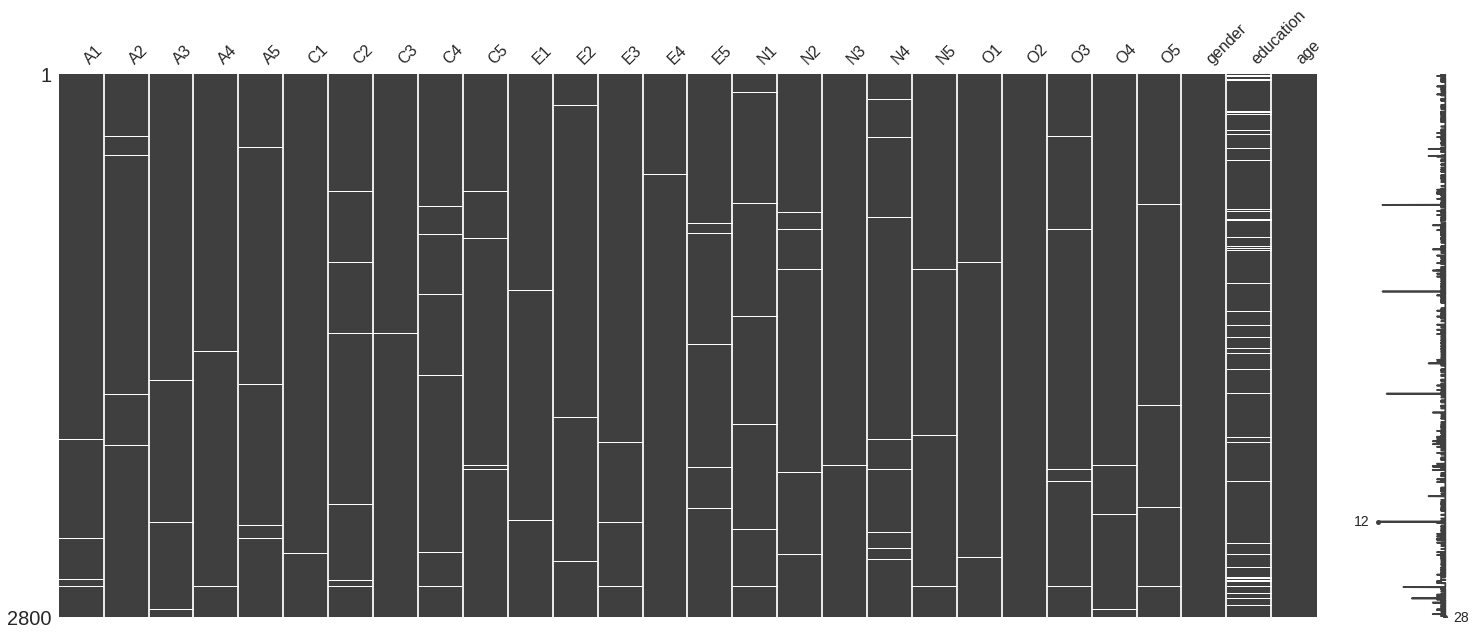

In [ ]:
msno.matrix(df)

Comentarios:
1. La primera parte que solicita eliminar la columna <code>Unnamed: 0</code> se realizó en la celda de código anterior.
2. Las variables <code>O2</code>, <code>gender</code> y <code>age</code> no tienen valores nulos, y la variable con más datos perdidos es <code>education</code>.

In [ ]:
len(df)

2800

In [ ]:
df_null_values = pd.DataFrame(df.isnull().sum().sort_values()).rename(columns = {0: "Cantidad"})
df_null_values["Proporción del df"] = round(df_null_values["Cantidad"]/len(df_null_values), 4)
df_null_values

,Cantidad,Proporción del df
age,0,0.0000
gender,0,0.0000
O2,0,0.0000
E4,9,0.3214
N3,11,0.3929
O4,14,0.5000
A5,16,0.5714
E2,16,0.5714
C5,16,0.5714
A1,16,0.5714


Comentarios:

1. La mayor cantidad de datos perdidos se encuentra en la variable <code>education</code>, con 223 filas con <code>np.nan</code>. El resto de variables tienen porcentajes de pérdida de 1.28% o menores.
2. Se crea un nuevo dataframe para continuar con el análisis.
3. Se borran las filas con uno o más registros nulos con <code>.dropna()</code> y se calcula el porcentaje de pérdida de información.

In [ ]:
df_model = df.copy()

df_model.dropna(inplace = True)

data_loss = 100 - ((len(df_model)/len(df)) * 100)

print(f"La cantidad de filas eliminadas con el método .dropna() es {len(df) - len(df_model)}, por lo que se pierde un {round(data_loss, 2)}% de los datos originales.")

La cantidad de filas eliminadas con el método .dropna() es 564, por lo que se pierde un 20.14% de los datos originales.


##**Desafío 3: Descripción**

1. Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
2. Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.
3. Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap. Comente sobre los principales patrones de correlación entre las preguntas de la batería.

Text(0.5, 1.0, 'Distribución de promedios de cada atributo de DataFrame')

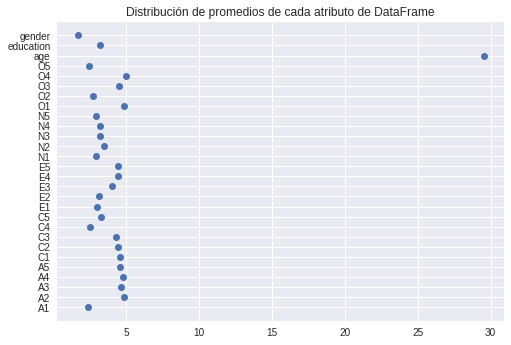

In [ ]:
atribute = []
mean = []

for colname, serie in df_model.items():
  atribute.append(colname)
  mean.append(serie.mean())

tmp1 = pd.DataFrame({"atribute" : atribute, "mean" : mean}).sort_values(by = "atribute")

plt.plot(tmp1["mean"], tmp1["atribute"], "o")
plt.rcParams["figure.figsize"] = (5, 5) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos
plt.title(f"Distribución de promedios de cada atributo de DataFrame")


Text(0.5, 1.0, 'Heatmap de variables del DataFrame')

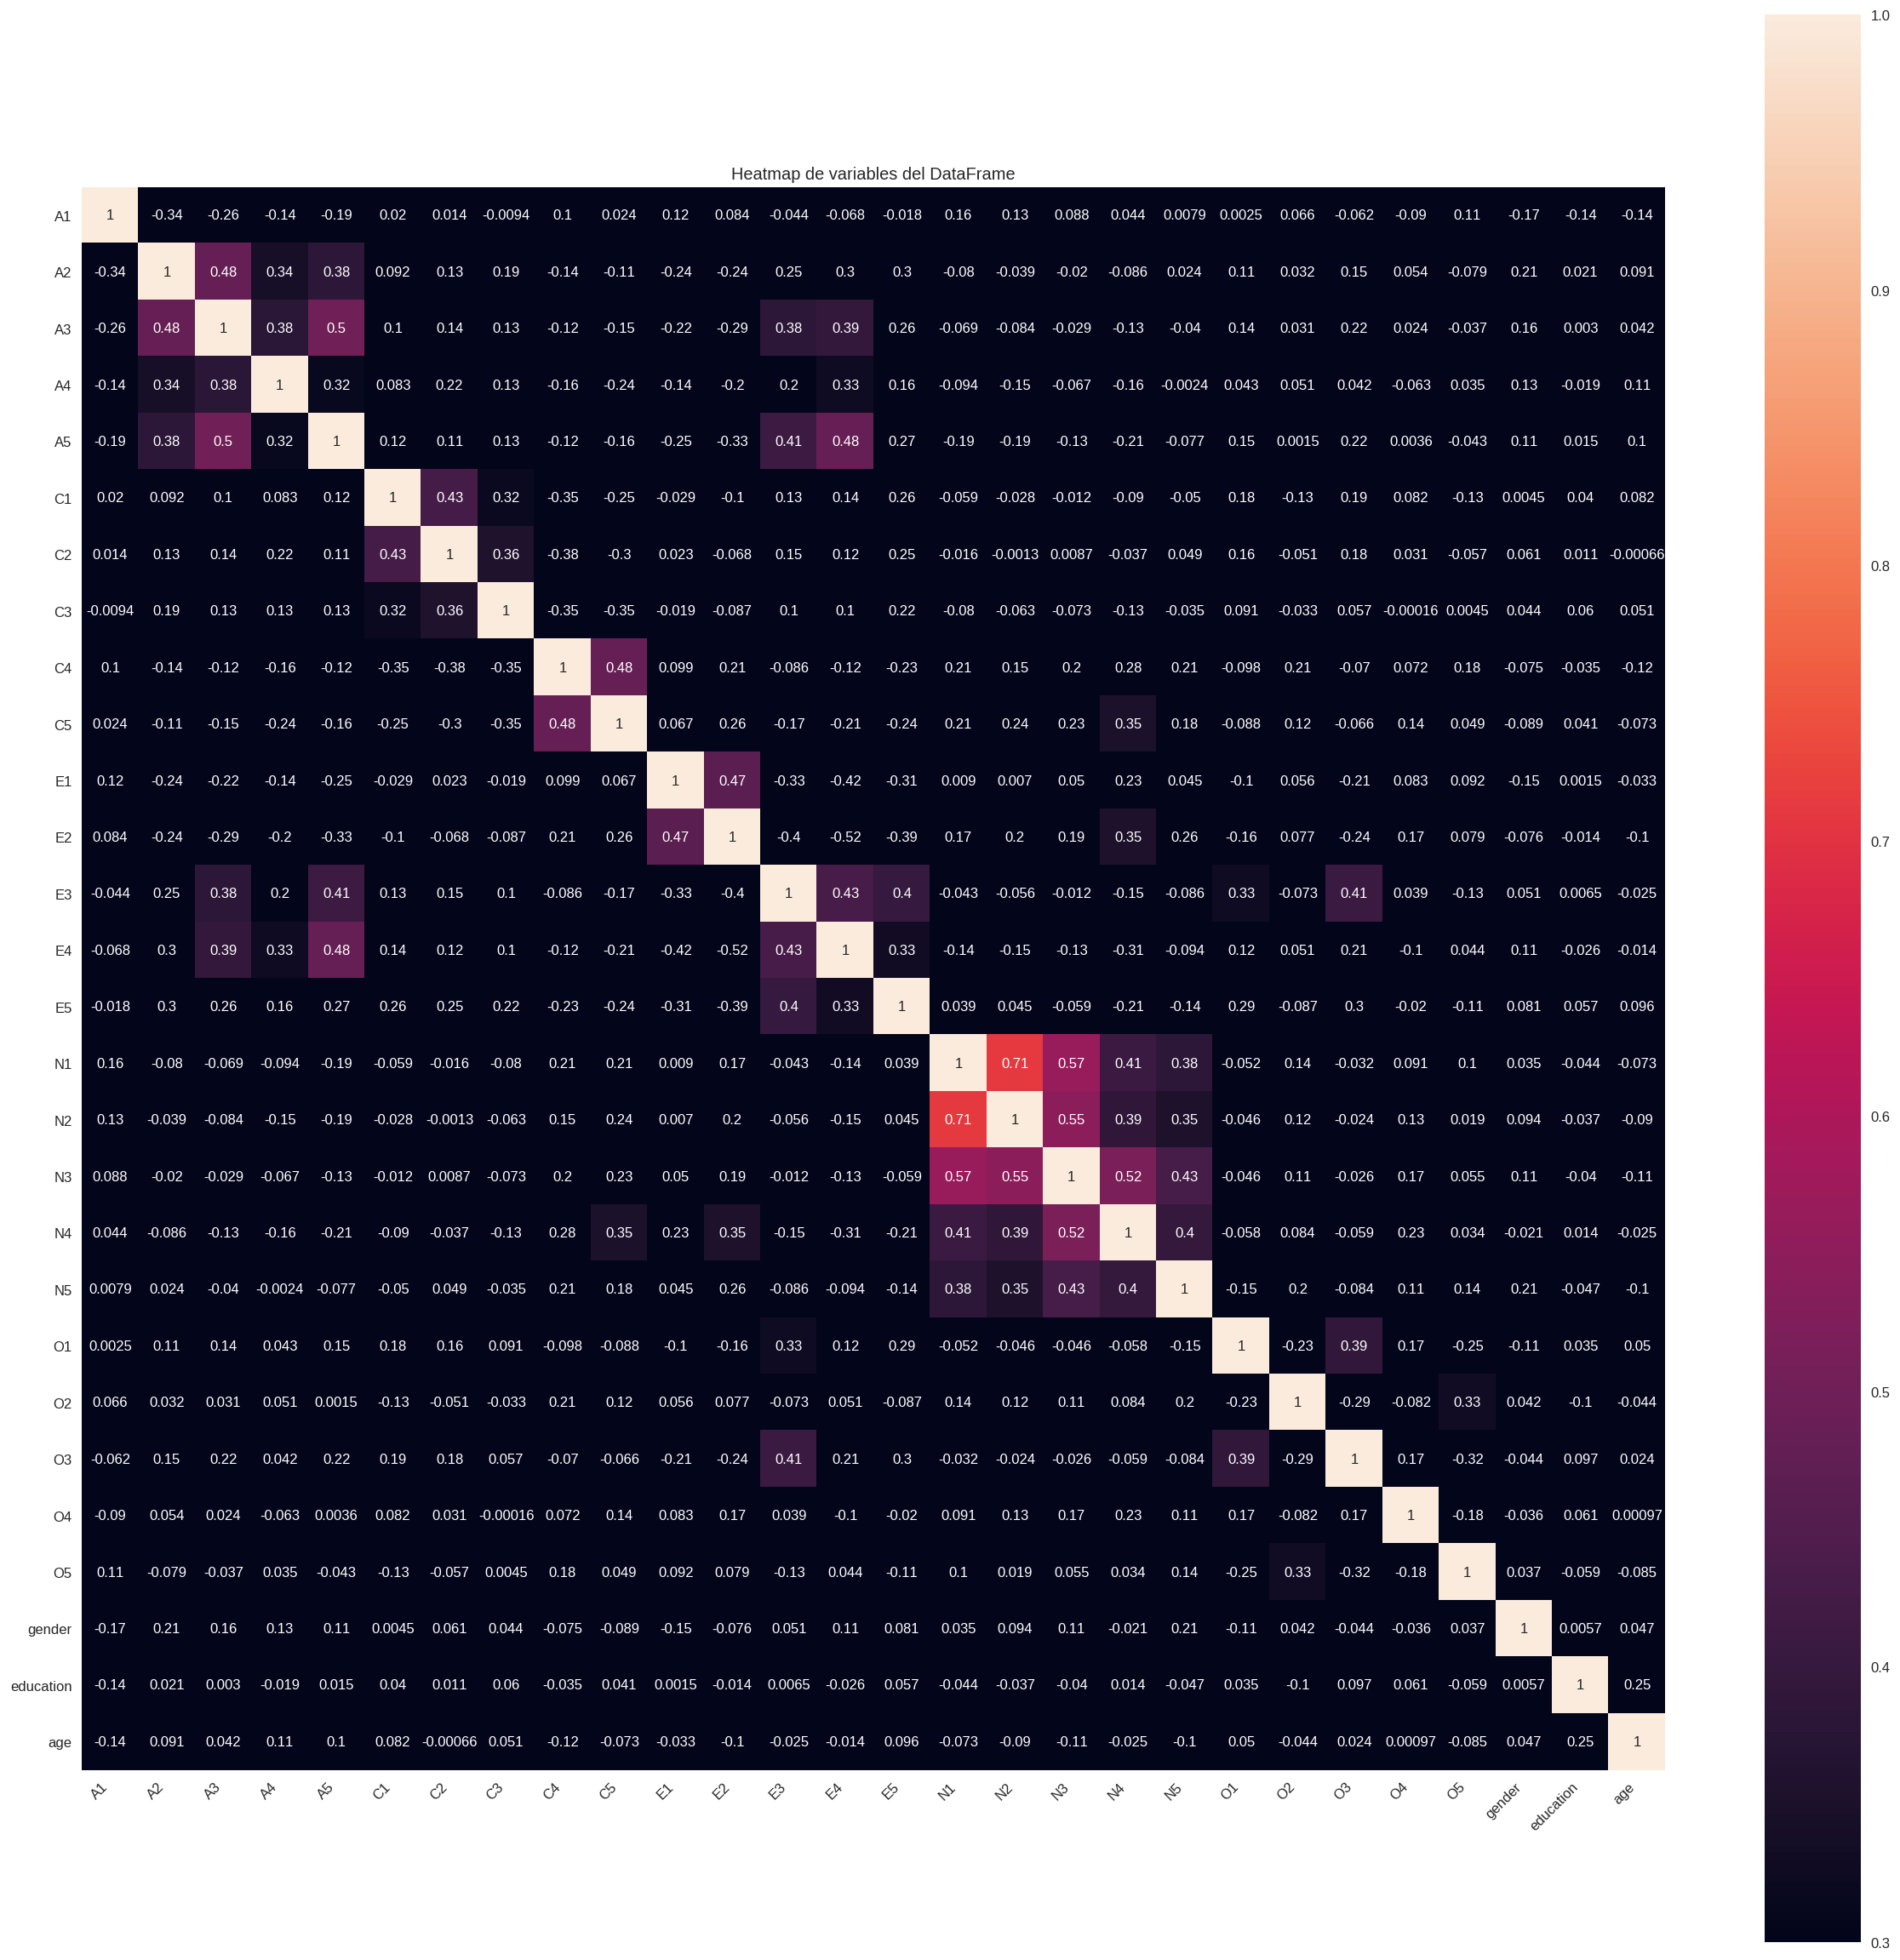

In [ ]:
corr = df_model.corr()

ax = sns.heatmap(
    corr,
    square = True,
    annot = True,
    vmin = 0.3
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
);

plt.rcParams["figure.figsize"] = (25, 25) #escalar gráficos
plt.rcParams["figure.dpi"] = 120 #DPI gráficos
plt.title("Heatmap de variables del DataFrame")

Comentarios:

1. Todos los atributos están en escalas semejantes, incluso <code>education</code>, pero <code>age</code> tiene un rango mayor, por lo que la media queda alejada en el gráfico mostrado.
2. Se observan correlaciones de importancia (según el criterio arbitrario de elegir correlaciones mayores o iguales a 0.3) en la matriz, de lo que se destaca:
* Correlaciones esperadas entre preguntas de la misma sección, como por ejemplo A1 y A2, o N1 y N2.
* Correlaciones altas entre preguntas de las secciones E y O, así como en C y E con preguntas de la sección N.
* Las correlaciones más altas entre grupos cruzados se observan entre preguntas de la sección A con la sección E.
3. Se  considera necesaria la estandarización de variables, ya que el rango de  <code>age</code> en comparación con el resto de variables es diferente y puede llevar a problemas en la modelación.


##**Desafío 4: Extracción de factores**

1. Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
2. Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones
latentes y no se aplique rotación.
3. Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
4. Refactoriza el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.
5. Extraiga las cargas λ del modelo e identifique qué ítems están asociados a cada factor. Comente sobre qué significa cada factor construído.

Comentarios:
1. Se procede con la estandarización de variables para asegurar que <code>age</code> no generará problemas en la interpretación del modelo.
2. Para esto, tal como indica la lectura, se utilizará la función <code>applymap</code>.

In [ ]:
df_model2 = df_model.loc[:, :].apply(lambda x: stats.zscore(x))
df_model2

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
5,2.611718,1.008010,0.287608,0.863797,0.330553,1.175851,1.219540,1.303246,-1.101564,-0.156741,-0.599341,-1.321371,1.482829,0.390273,1.189181,0.058616,0.986895,-0.750966,-0.753285,0.029510,-0.733668,0.201112,0.433359,0.895084,-1.094849,0.699767,-0.172223,-0.798201
7,1.174582,-1.585672,-2.815369,0.173007,-2.855296,-1.290568,-1.831527,-0.250918,-0.367626,0.457047,0.018799,1.793309,-0.007331,-1.666249,-2.570729,1.976646,-0.316529,-0.750966,1.810406,0.646178,-1.626690,-0.445919,-0.404868,0.044145,0.409811,-1.429048,-1.071965,-0.985786
10,1.174582,-0.721112,0.287608,0.863797,0.330553,-0.468428,-1.068761,0.526164,0.366313,-0.770530,-1.217480,-0.075499,-1.497491,0.390273,-0.314783,0.058616,-0.316529,0.502138,-0.753285,0.029510,0.159354,0.201112,0.433359,0.895084,0.409811,-1.429048,-1.971707,-0.798201
14,1.174582,0.143449,-2.039625,-1.899365,-2.855296,0.353711,0.456773,0.526164,-0.367626,-0.770530,0.018799,0.547437,-0.752411,1.075780,0.437199,-0.580727,0.335183,-0.750966,-0.753285,0.029510,0.159354,-0.445919,0.433359,0.044145,1.914471,-1.429048,-1.971707,-1.173371
22,-0.981122,0.143449,1.063353,0.173007,1.127016,-0.468428,-1.068761,-1.805082,1.100251,1.070836,-0.599341,-1.321371,-1.497491,0.390273,-1.818747,-0.580727,-0.968241,-0.750966,-0.753285,-0.587159,1.052376,-1.092951,0.433359,0.044145,-0.342519,-1.429048,1.627262,3.610045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,1.893150,0.143449,0.287608,0.863797,0.330553,1.175851,1.219540,-1.805082,1.100251,1.070836,1.255077,-1.321371,0.737749,1.075780,-0.314783,1.337303,0.335183,1.128690,-0.112362,0.646178,-0.733668,1.495175,0.433359,-0.806794,1.162141,0.699767,-0.172223,-0.704408
2793,0.456014,-0.721112,-1.263881,-2.590155,-1.262371,0.353711,-0.305994,0.526164,0.366313,0.457047,0.018799,1.170373,-1.497491,-0.980741,-2.570729,1.337303,1.638606,1.128690,1.169483,1.879515,1.052376,-1.092951,-0.404868,0.044145,-0.342519,0.699767,0.727520,-0.516823
2797,-0.262554,-1.585672,0.287608,-1.899365,0.330553,0.353711,0.456773,0.526164,-1.101564,-1.384318,-0.599341,-0.698435,1.482829,-0.980741,1.189181,0.058616,0.335183,-0.124414,-0.112362,-1.203827,0.159354,-1.092951,1.271586,-0.806794,0.409811,0.699767,0.727520,-0.047861
2798,1.893150,-2.450233,-2.039625,-0.517784,-0.465909,0.353711,0.456773,0.526164,-0.367626,1.684624,-0.599341,-0.698435,-0.007331,0.390273,-0.314783,1.337303,0.986895,1.755243,0.528561,-1.203827,0.159354,-0.445919,0.433359,0.044145,-1.094849,-1.429048,0.727520,0.139724


Comentarios:
1. Luego de estandarizar las variables, se analiza la idoneidad del conjunto de datos para someterlo a un análisis factorial, realizando las pruebas de esfericidad de Bartlett y Kaiser-Meyer-Olkin.

In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(df_model2)
print("Valor chi-cuadrado: ", chi_square_value, "\nValor p: ", p_value)

Valor chi-cuadrado:  17359.07741974566 
Valor p:  0.0


In [ ]:
kmo = calculate_kmo(df_model2)
kmo

(array([0.75129086, 0.84380058, 0.87259439, 0.86196987, 0.89609538,
        0.83302616, 0.78347906, 0.84259756, 0.82855151, 0.85692691,
        0.84543297, 0.88171534, 0.89014498, 0.87432169, 0.89167722,
        0.77258165, 0.77820795, 0.8586007 , 0.87843955, 0.84636179,
        0.85238344, 0.78043226, 0.83381538, 0.78621003, 0.76220566,
        0.71209407, 0.58446076, 0.60850663]), 0.8385815853066387)

Comentarios:
1. La prueba de esfericidad de Bartlett tuvo buenos resultados: se rechaza la hipótesis nula que afirma que la matriz <code>df_model2</code> es una matriz identidad. Esto implica que sí existe grado de correlación entre dos o más variables en la matriz.
2. La prueba de Kaiser-Meyer-Olkin muestra que el valor global es alto (sobre el valor de 0.7 recomendado), por lo que se puede continuar con el análisis factorial. No se eliminan las variables con factores menores a 0.7 ya que son solicitadas posteriormente en el enunciado.
3. Posteriormente se aplicará <code>FactorAnalyzer</code> con 10 dimensiones latentes, sin considerar rotación.

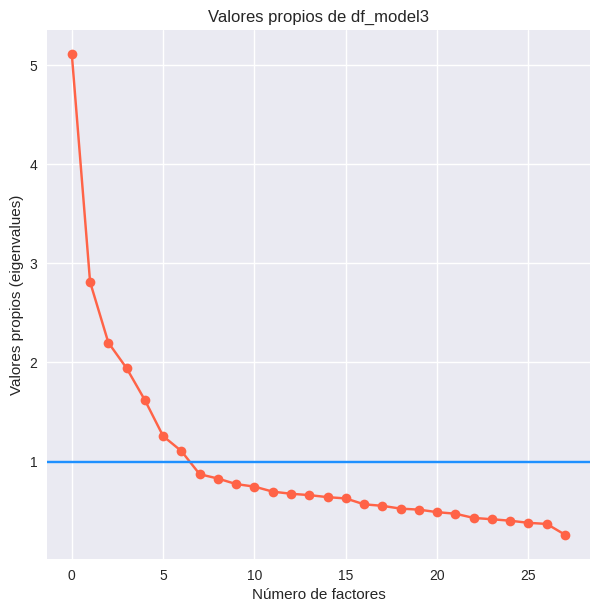

In [ ]:
factorize = factor.FactorAnalyzer(n_factors = 10)
factorize.fit(df_model2)

screeplot = factorize.get_eigenvalues()[0]

plt.plot(screeplot,
         "o-",
         color = "tomato")

plt.xlabel("Número de factores")
plt.ylabel("Valores propios (eigenvalues)")
plt.axhline(1, color = "dodgerblue")
plt.title("Valores propios de df_model2")

plt.rcParams["figure.figsize"] = (7, 7) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos

Comentarios:
1. Luego de graficar la curva, se observa que los primeros 7 valores propios son los más útiles, ya que logran explicar una varianza mayor a la de una sola variable.
2. Se re-factorizará el modelo con estos 7 factores. Se sobreescribirá la variable anteriormente asignada para tal labor, <code>factorize</code>.

In [ ]:
factorize = factor.FactorAnalyzer(n_factors = 7).fit(df_model2)

cols = list(df_model2.columns)

factor_loadings = factorize.loadings_
factor_loadings

tmp3 = pd.DataFrame(factor_loadings, index = cols).rename(columns = {
                                                                    0 : "Factor 1",
                                                                    1 : "Factor 2",
                                                                    2 : "Factor 3",
                                                                    3 : "Factor 4",
                                                                    4 : "Factor 5",
                                                                    5 : "Factor 6",
                                                                    6 : "Factor 7"
                                                                    })

tmp3.style.background_gradient(cmap = "bone")

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
A1,0.126618,-0.288910,0.118779,-0.061290,0.167846,0.494158,-0.107915
A2,0.025105,0.556302,0.040593,-0.055391,-0.042093,-0.359817,0.041066
A3,-0.049347,0.686323,0.010424,-0.043709,-0.006183,-0.187538,-0.031234
A4,-0.083608,0.457966,0.169807,-0.007238,0.179593,-0.135224,0.021572
A5,-0.171731,0.649533,-0.026182,-0.094864,0.028786,-0.044576,0.018965
C1,0.059776,0.019942,0.565949,0.089814,-0.124787,0.100546,0.041291
C2,0.095800,0.116763,0.703884,0.203540,-0.033623,0.072606,-0.063805
C3,0.003958,0.075160,0.580623,0.103291,0.069887,0.014853,0.044518
C4,0.091514,0.171154,-0.649913,0.099525,0.156490,0.222583,0.007364
C5,0.175467,0.014263,-0.545399,0.120605,-0.031821,0.057921,0.065218


Comentarios:

1. Factor 1: Eexplica la variabilidad del bloque de preguntas <code>N</code>.
2. Factor 2: El factor será útil para explicar las variaciones de las preguntas del bloque <code>A</code>, ya que presenta cargas importantes en relación a tales preguntas, y también es útil para mostrar tendencias de parte del bloque <code>E</code> (<code>E3</code> y <code>E4</code> principalmente).
3. Factor 3: Este factor tiene cargas importantes relacionadas a las preguntas del bloque <code>C</code>.
4. Factor 4: El factor muestra cargas considerables en relación a las preguntas del bloque <code>E</code>, aunque también muestra una relación (aunque más débil) con <code>N4</code>.
5. Factor 5: Este factor tiene sus mayores cargas asociadas al bloque <code>O</code>.
6. Factor 6: Este factor tiene más dispersión: tiene cargas importantes asociadas a parte del bloque <code>A</code> (<code>A1</code> y <code>A2</code>), y también tiene un grado de relación (aunque con carga negativa) con la variable <code>gender</code>.
7. Factor 7: Este factor es el más específico: sus cargas más importantes (y con mucha diferencia respecto a las cargas que se pueden considerar como no significativas) están asociadas a <code>education</code> y <code>age</code>.

##**Desafío 5: Modelación de factores**

1. Extraiga los puntajes del modelo factorial a su base de datos.
2. Grafique la densidad de cada uno con kdplot.
3. Modele y comente brevemente sobre cuáles son los principales determinantes de
cada factor en base al siguiente modelo estimable:

>𝑦 = β0 + β1𝑔𝑒𝑛𝑑𝑒𝑟 + β2𝑒𝑑𝑢𝑐𝑎𝑡𝑖𝑜𝑛 + β1𝑎𝑔𝑒 + ε𝑖

Comentarios:
1. Se calculará la varianza acumulada de los factores.

In [ ]:
factor_var = factorize.get_factor_variance()
pd.DataFrame(factor_var)

tmp4 = pd.DataFrame(factor_var).rename(columns = {
                                                  0 : "Factor 1",
                                                  1 : "Factor 2",
                                                  2 : "Factor 3",
                                                  3 : "Factor 4",
                                                  4 : "Factor 5",
                                                  5 : "Factor 6",
                                                  6 : "Factor 7"
                                                  }, 
                                       index = {
                                                0 : "SS Loadings",
                                                1 : "Proportion Var",
                                                2 : "Cumulative Var"
                                                })

tmp4

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
SS Loadings,2.772517,2.305191,2.035906,1.835047,1.599789,0.846568,0.643502
Proportion Var,0.099018,0.082328,0.072711,0.065537,0.057135,0.030235,0.022982
Cumulative Var,0.099018,0.181347,0.254058,0.319595,0.376730,0.406965,0.429947


Comentarios:
1. Las cargas de cada factor son decrecientes, como podía esperarse.
2. Si se observa la varianza acumulada, los 7 factores explican en total un 43% de la varianza de los registros de la totalidad del DataFrame.
3. Se graficarán en un <code>kdplot</code> los factores ya calculados.

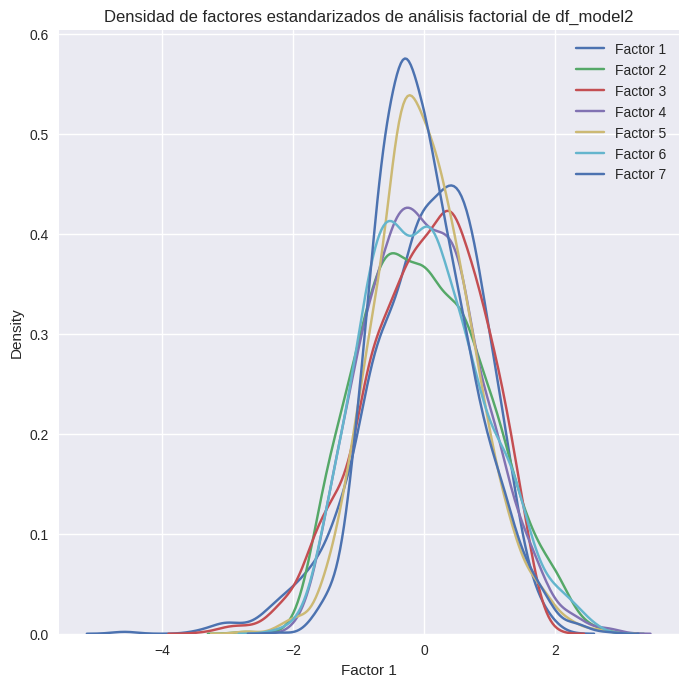

In [ ]:
extract_factor_scores = factorize.transform(df_model2)

tmp5 = pd.DataFrame(extract_factor_scores).rename(columns = {
                                                            0 : "Factor 1",
                                                            1 : "Factor 2",
                                                            2 : "Factor 3",
                                                            3 : "Factor 4",
                                                            4 : "Factor 5",
                                                            5 : "Factor 6",
                                                            6 : "Factor 7"
                                                            })


sns.kdeplot(tmp5.loc[:, "Factor 1"], label = "Factor 1"),
sns.kdeplot(tmp5.loc[:, "Factor 2"], label = "Factor 2"),
sns.kdeplot(tmp5.loc[:, "Factor 3"], label = "Factor 3"),
sns.kdeplot(tmp5.loc[:, "Factor 4"], label = "Factor 4"),
sns.kdeplot(tmp5.loc[:, "Factor 5"], label = "Factor 5"),
sns.kdeplot(tmp5.loc[:, "Factor 6"], label = "Factor 6"),
sns.kdeplot(tmp5.loc[:, "Factor 7"], label = "Factor 7"),

plt.legend()
plt.title("Densidad de factores estandarizados de análisis factorial de df_model2")
plt.rcParams["figure.figsize"] = (8, 8) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos

Comentarios:
1. Se realizará análisis factorial del DataFrame ahora con solo los atributos especificados: <code>gender</code>, <code>education</code> y <code>age</code>.
2. Se recalcularán las medidas de esfericidad y KMO.
3. Se elegirá <code>n_factors = 2</code>.

In [ ]:
df_model3 = df_model2.loc[:, "gender" : "age"]

df_model3.reset_index(drop = True)

chi_square_value2, p_value2 = calculate_bartlett_sphericity(df_model3)
print("Valor chi-cuadrado: ", chi_square_value, "\nValor p: ", p_value)

Valor chi-cuadrado:  17359.07741974566 
Valor p:  0.0


In [ ]:
kmo2 = calculate_kmo(df_model3)
kmo2

(array([0.49860007, 0.49973509, 0.49973653]), 0.49971599639156594)

Comentarios:

1. La esfericidad de Bartlett no varía a pesar de haber realizado cambios en la matriz.
2. El KMO sí varió y disminuyó bajo el mínimo aceptable por convención de 0.7 (en cada atributo y también el general como consecuencia), pero se continuará el análisis como indica el enunciado y se sacarán conclusiones según la varianza acumulada.

>Esto implica que estos factores no son suficientes para hacer un análisis factorial, no entregan información suficiente. A pesar de que se rechaza la hipótesis nula y los atributos no son variables independientes, no bastan porque el nivel de correlación parcial entre ellas no es alto como para modelar en base a factores latentes derivados de estas.

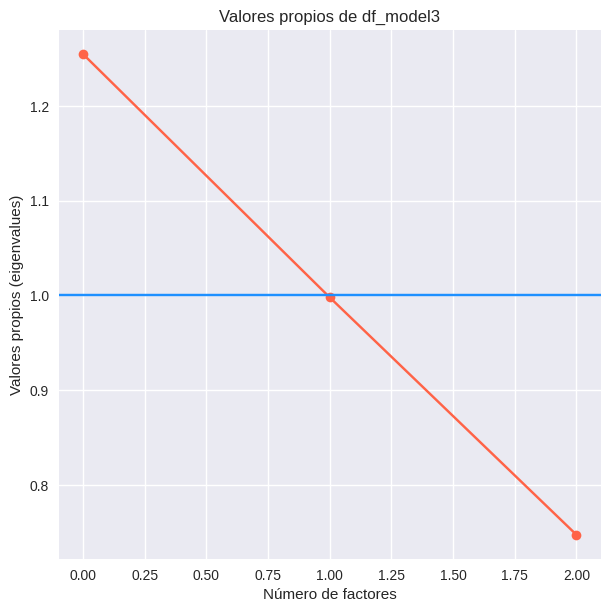

In [ ]:
factorize2 = factor.FactorAnalyzer(n_factors = 2, rotation = "varimax")
factorize2.fit(df_model3)

screeplot2 = factorize2.get_eigenvalues()[0]

plt.plot(screeplot2,
         "o-",
         color = "tomato")

plt.xlabel("Número de factores")
plt.ylabel("Valores propios (eigenvalues)")
plt.axhline(1, color = "dodgerblue")
plt.title("Valores propios de df_model3")

plt.rcParams["figure.figsize"] = (7, 7) #escalar gráficos
plt.rcParams["figure.dpi"] = 100 #DPI gráficos

In [ ]:
cols2 = list(df_model3.columns)

factor_loadings2 = factorize2.loadings_
factor_loadings2

tmp6 = pd.DataFrame(factor_loadings2, index = cols).rename(columns = {
                                                                    0 : "Factor 1",
                                                                    1 : "Factor 2",
                                                                    })

tmp6.style.background_gradient(cmap = "bone")

,Factor 1,Factor 2
gender,0.020606,0.201680
education,0.513225,-0.024028
age,0.493931,0.182454


Comentarios:
1. El factor 1 logra explicar con cierto grado de precisión, dadas las cargas asociadas, a <code>education</code> y <code>age</code>, y el factor 2 explica con un grado de precisión mucho menor a <code>gender</code> y <code>age</code>.
2. Se calculará la varianza acumulada.

In [ ]:
factor_var2 = factorize2.get_factor_variance()
pd.DataFrame(factor_var2)

tmp7 = pd.DataFrame(factor_var2).rename(columns = {
                                                  0 : "Factor 1",
                                                  1 : "Factor 2",
                                                  }, 
                                       index = {
                                                0 : "SS Loadings",
                                                1 : "Proportion Var",
                                                2 : "Cumulative Var"
                                                })

tmp7

,Factor 1,Factor 2
SS Loadings,0.507792,0.074542
Proportion Var,0.169264,0.024847
Cumulative Var,0.169264,0.194111


Comentarios:
1. El análisis factorial con 2 factores permite explicar solo un 19% de la varianza de los datos del conjunto.
2. En relación a los factores, asociados de la forma mostrada en el enunciado (que no concuerda con lo detectado al calcular las cargas):
* Factor 1: Si se considera como factor para explicar las variables <code>gender</code> y <code>age</code>, se observa que este no representaría de forma importante a la primera variable, ya que la carga del factor asociada es muy baja.
* Factor 2: Si este factor se asocia a la representatividad de <code>education</code>, tiene un poder explicativo prácticamente nulo, y menor al que posee en relación a las otras 2 variables.
* La separación solicitada por el enunciado no es recomendable según lo detectado: los factores no tienen cargas importantes asociadas a esa agrupación de los atributos.